# **Clustering and PCA**

### **Mushroom Dataset**

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``poisonous`` es binaria.


In [ ]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## **1. Leer conjunto de datos y primer vistazo**

In [ ]:
# Cargamos el dataset de setas
df = pd.read_csv('mushrooms.csv')

# Visualizamos las primeras filas del dataframe
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Vemos valores únicos por cada columna y nos damos cuenta de que el stalk-root tiene un valor de "?"

In [ ]:
attribute_mappings = {
    'class': {
        'e': 'edible',
        'p': 'poisonous'
    },
    'cap-shape': {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    },
    'cap-surface': {
        'f': 'fibrous',
        'g': 'grooves',
        'y': 'scaly',
        's': 'smooth'
    },
    'cap-color': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'r': 'green',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'bruises': {
        't': 'bruises',
        'f': 'no'
    },
    'odor': {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    },
    'gill-attachment': {
        'a': 'attached',
        'd': 'descending',
        'f': 'free',
        'n': 'notched'
    },
    'gill-spacing': {
        'c': 'close',
        'w': 'crowded',
        'd': 'distant'
    },
    'gill-size': {
        'b': 'broad',
        'n': 'narrow'
    },
    'gill-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'g': 'gray',
        'r': 'green',
        'o': 'orange',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-shape': {
        'e': 'enlarging',
        't': 'tapering'
    },
    'stalk-root': {
        'b': 'bulbous',
        'c': 'club',
        'u': 'cup',
        'e': 'equal',
        'z': 'rhizomorphs',
        'r': 'rooted',
        '?': 'missing'
    },
    'stalk-surface-above-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-surface-below-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-color-above-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-color-below-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'veil-type': {
        'p': 'partial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'brown',
        'o': 'orange',
        'w': 'white',
        'y': 'yellow'
    },
    'ring-number': {
        'n': 'none',
        'o': 'one',
        't': 'two'
    },
    'ring-type': {
        'c': 'cobwebby',
        'e': 'evanescent',
        'f': 'flaring',
        'l': 'large',
        'n': 'none',
        'p': 'pendant',
        's': 'sheathing',
        'z': 'zone'
    },
    'spore-print-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'r': 'green',
        'o': 'orange',
        'u': 'purple',
        'w': 'white',
        'y': 'yellow'
    },
    'population': {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    },
    'habitat': {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }
}

Buscamos la descripción de los valores.

In [ ]:
def decode_feature(value, feature_name):
    """Decode a feature using the mapping dictionary"""
    return attribute_mappings[feature_name].get(value, value)

# Transfor all dataframe
def decode_dataframe(df):
    df_decoded = df.copy()

    for column in df.columns:
        if column in attribute_mappings:
            df_decoded[column] = df_decoded[column].apply(lambda x: decode_feature(x, column))
    return df_decoded

df_decoded = decode_dataframe(df)
print(df_decoded.head(5))

df_decoded.to_csv('mushrooms-decoded.csv', index=False)
print("Decoded data saved to 'mushrooms-decoded.csv'")

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

In [ ]:
df_decoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## **2. Exploración de datos**

In [ ]:
print('La forma del dataset es', df.shape)
print('Rows duplicadas en train dataset :', df.duplicated().sum() )

La forma del dataset es (8124, 23)
Rows duplicadas en train dataset : 0


In [ ]:
# Descripción del conjunto de datos, estándard.
df_decoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Información sobre el tipo de datos de cada feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###  **Análisis Descriptivo del Dataset**

**Dataset:** 8,124 setas con 23 variables categóricas (sin valores nulos)

#### Variable target balanceada:** 52% comestibles vs 48% venenosas
- **Variable sin información:** `veil-type` tiene valor único ('p') → **eliminar**
- **Variables con alta diversidad:** `gill-color` (12 categorías), `cap-color` (10), `odor` (9)
- **Potencial predictivo alto:** Variables como `odor` y colores muestran buena variabilidad

#### Acción requerida:
Eliminar `veil-type` en el preprocesamiento por falta de variabilidad.

## **3. Calcular el número de nulos de cada feature**

In [ ]:
# Igual que otras veces, una linea, contar los nulos por variable.
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


### **Información de Tipos de Datos**

**Estructura:** 8,124 filas × 23 columnas | **Memoria:** 1.4+ MB

#### Confirmaciones:
- **Sin valores nulos:** Todas las columnas tienen 8,124 valores completos
- **Tipo homogéneo:** Las 23 variables son `object` (categóricas en pandas)
- **Dataset limpio:** No requiere imputación de valores faltantes
- **Listo para encoding:** Todas las variables necesitarán transformación a numéricas


## **4. Buscar valores extraños. Para ello, ver los valores únicos en cada feature**

In [ ]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
unique_values_df = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].nunique() for col in df.columns]
})
unique_values_df

,features,n_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


### **Análisis de Valores Únicos por Variable**

#### Variables Problemáticas:
- **`veil-type`**: 1 valor único → **ELIMINAR** (no aporta información)

#### Variables Binarias (2 valores):
- `class` (target), `bruises`, `gill-attachment`, `gill-spacing`, `gill-size`, `stalk-shape`

#### Variables con Alta Diversidad:
- **`gill-color`**: 12 categorías (máxima diversidad)
- **`cap-color`**: 10 categorías  
- **`odor`**: 9 categorías (potencial predictivo alto)
- **`stalk-color-above-ring`** y **`stalk-color-below-ring`**: 9 categorías cada una

#### Variables de Cardinalidad Media:
- **`habitat`**: 7 categorías
- **`cap-shape`**: 6 categorías
- **`stalk-root`**: 5 categorías

#### Conclusión:
Confirmamos que `veil-type` debe eliminarse. El resto muestra buena variabilidad para clustering.

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


## **5. Tratar aquellos valores que entendamos que sean nulos**


In [ ]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
# Primero, veamos si hay valores extraños como '?' en alguna columna
for col in df_decoded.columns:
   unique_vals = df_decoded[col].unique()
   if 'missing' in unique_vals:
       print(f"Columna {col} tiene valores '?': {sum(df_decoded[col] == 'missing')} casos")
       print(f"Valores únicos en {col}: {unique_vals}")

Columna stalk-root tiene valores '?': 2480 casos
Valores únicos en stalk-root: ['equal' 'club' 'bulbous' 'rooted' 'missing']


In [ ]:
df_decoded.replace("missing", np.nan, inplace=True)

In [ ]:
# Análisis de Missing Values
missing_data = df_decoded.isnull().sum()
missing_data_percentage = (missing_data / len(df_decoded)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
stalk-root,2480,30.526834
cap-shape,0,0.000000
class,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
cap-surface,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-color,0,0.000000


In [ ]:
df_decoded['stalk_root_missing'] = df_decoded['stalk-root'].isna().astype(int)

In [ ]:
for col in df_decoded.columns:
    if col != 'stalk_root_missing':  # evitamos cruzarla consigo misma
        rate = df_decoded.groupby(col)['stalk_root_missing'].mean()
        print(f"\nPorcentaje de missing en 'stalk-root' según '{col}':\n{rate}")


Porcentaje de missing en 'stalk-root' según 'class':
class
edible       0.171103
poisonous    0.449438
Name: stalk_root_missing, dtype: float64

Porcentaje de missing en 'stalk-root' según 'cap-shape':
cap-shape
bell       0.336283
conical    0.000000
convex     0.223195
flat       0.228426
knobbed    0.956522
sunken     0.000000
Name: stalk_root_missing, dtype: float64

Porcentaje de missing en 'stalk-root' según 'cap-surface':
cap-surface
fibrous    0.068966
grooves    0.000000
scaly      0.315660
smooth     0.507042
Name: stalk_root_missing, dtype: float64

Porcentaje de missing en 'stalk-root' según 'cap-color':
cap-color
brown       0.490368
buff        0.285714
cinnamon    0.000000
gray        0.078261
green       1.000000
pink        0.333333
purple      1.000000
red         0.608000
white       0.153846
yellow      0.014925
Name: stalk_root_missing, dtype: float64

Porcentaje de missing en 'stalk-root' según 'bruises':
bruises
bruises    0.056872
no         0.481887
Name: stal

El missing (stalk-root) se relaciona con muchas variables del dataset como:

- odor (100% en fishy y spicy),

- ring-type(100% en flaring),

- cap-shape(96% en knobbed),

- spore-print-color(93% en wite,buff,orange),

- habitat(más de 90% en waste,leaves),

- population(85% en clustered),

- class (45% en poisonous)

Podemos afirmar que los datos faltantes son MAR (Missing At Random), condicionado a otras variables.

In [ ]:
from scipy.stats import chi2_contingency

# Contar ocurrencias de cada categoría en función de si hay NaN o no
contingency_table = pd.crosstab(df_decoded['stalk_root_missing'], df_decoded['class'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2_stat}, P-value: {p_val}")

Chi2 statistic: 739.6348785045413, P-value: 7.197356068384773e-163


El p-value es muy muy bajo (mucho < 0.05) y el chi-cuadrado muy alto, por lo que podemos rechazar la hipótesis nula de independencia, lo que sugiere que los faltantes podrían ser MNAR.

In [ ]:
df_decoded.drop(columns=['stalk_root_missing'], inplace=True)

In [ ]:
df_decoded['stalk-root'] = df_decoded['stalk-root'].fillna('missing')

### **Valores Faltantes Detectados**

#### Problema encontrado:
- **`stalk-root`**: 2,480 casos con '?' (30.5% del dataset)
- **Valores válidos**: ['e', 'c', 'b', 'r'] + '?' (nulo)

#### Opciones de tratamiento:
1. **Eliminar filas** con '?' (perdemos 30% de datos)
2. **Imputar con moda** (categoría más frecuente)
3. **Tratar '?' como categoría** independiente

#### Decisión adoptada:
**Opción 3** - Mantener '?' como categoría válida porque:
- Preserva el 30% de observaciones (crucial para clustering)
- No introduce sesgo artificial en los datos
- '?' representa información real: "raíz no visible/identificable"
- Permite que el clustering detecte patrones naturales en setas con esta característica

## **6. Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla**

In [ ]:
# Dejar por el camino si procede.
print("Features con un solo valor único (no informativas):")
features_to_drop = unique_values_df[unique_values_df['n_values'] == 1]['features'].tolist()
print(features_to_drop)

# Eliminar la feature que no aporta información
df_clean = df.drop(columns=features_to_drop)
print(f"\nDataset original: {df.shape}")
print(f"Dataset limpio: {df_clean.shape}")
print(f"Features eliminadas: {features_to_drop}")

Features con un solo valor único (no informativas):
['veil-type']

Dataset original: (8124, 23)
Dataset limpio: (8124, 22)
Features eliminadas: ['veil-type']


### **Eliminación de Variables No Informativas**

#### Resultado:
- **Variable eliminada:** `veil-type` (valor constante 'p')
- **Dataset:** 8,124 filas × 22 columnas (era 23)
- **Justificación:** Variables con varianza cero no aportan información para clustering

In [ ]:
for col in df_clean.columns:
    print(df_clean[col].value_counts(normalize=True), "\n")

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64 

cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: proportion, dtype: float64 

cap-surface
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: proportion, dtype: float64 

cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64 

bruises
f    0.584441
t    0.415559
Name: proportion, dtype: float64 

odor
n    0.434269
f    0.265879
s    0.070901
y    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: proportion, dtype: float64 

gill-attachment
f    0.974151
a    0.025849
Name: proportion, dtype: float64 

gill-spacing
c    0.838503
w    0.161497
Name: proportion, dtype: float64 

gill-size
b    0.690793
n    0.309207
Name: proportion, dtype: float64 

gill-color
b    0.212703
p    0.183653
w    0.147

En gill-attachment el free ~97.4%
En veil-color el white ~97.5%
En ring-number el one ~92.2%

-> Mantenerlas para árboles o modelos robustos

-> Eliminarlas para reducir la dimensionalidad o para usar modelos sensibles a varianza (como regresión logística)

## **7. Separar entre variables predictoras y variables a predecir**

In [ ]:
# La variable que trata de predecir este conjunto de datos es 'poisonous'.
y = df_clean['class']
X = df_clean.drop(columns=['class'])

print(f"Variable target (y): {y.shape}")
print(f"Variables predictoras (X): {X.shape}")
print(f"Distribución de clases: {y.value_counts()}")

Variable target (y): (8124,)
Variables predictoras (X): (8124, 21)
Distribución de clases: class
e    4208
p    3916
Name: count, dtype: int64


### **Separación de Variables**

#### Resultado:
- **Variable target (y):** 8,124 observaciones
- **Variables predictoras (X):** 8,124 filas × 21 columnas  
- **Balance de clases:** 52% comestibles (e) vs 48% venenosas (p)

#### Confirmación:
Dataset bien balanceado y listo para One-Hot Encoding de las variables categóricas.

## **8. Codificar correctamente las variables categóricas a numéricas**

In [ ]:
# One Hot Encoder (una linea).
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"Variables originales: {X.shape[1]}")
print(f"Variables después de encoding: {X_encoded.shape[1]}")
print(f"Filas: {X_encoded.shape[0]}")

Variables originales: 21
Variables después de encoding: 95
Filas: 8124


## **9. Train test split**

In [ ]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (5443, 95), Test: (2681, 95)


## **10. PCA**

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

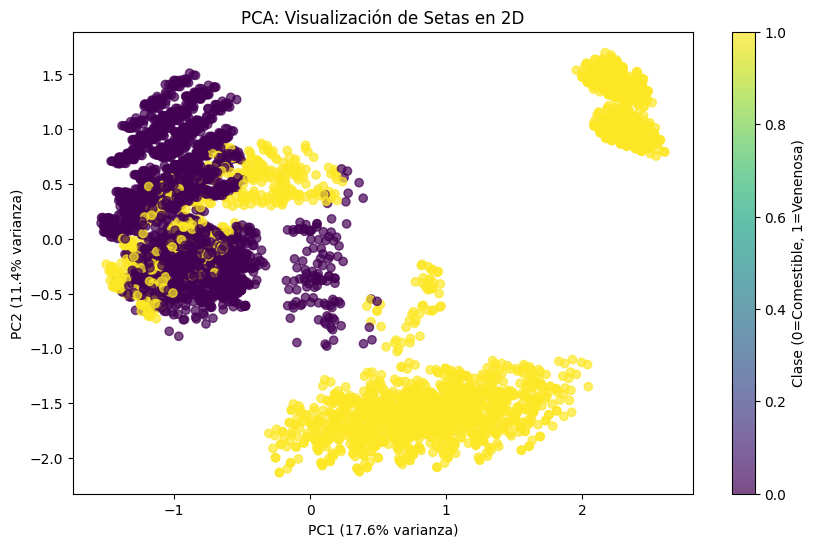

Varianza explicada total: 29.0%


In [ ]:
pca = PCA(n_components=2)       # metodo de sklearn
pca.fit(X_train)

# Transformar los datos a 2 dimensiones
X_train_pca = pca.transform(X_train)

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({'e': 0, 'p': 1}),
                    cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Visualización de Setas en 2D')
plt.colorbar(scatter, label='Clase (0=Comestible, 1=Venenosa)')
plt.show()

print(f'Varianza explicada total: {sum(pca.explained_variance_ratio_):.1%}')

### **Resultados del PCA - Visualización 2D**

#### Separabilidad de Clases:
- **Separación clara:** Se observan **clusters distintivos** entre comestibles (amarillo) y venenosas (morado)
- **Patrones identificables:** Múltiples grupos bien diferenciados por tipo
- **Solapamiento limitado:** Pocas setas en zonas ambiguas

#### Información Retenida:
- **PC1:** 17.0% de varianza (eje horizontal)
- **PC2:** 13.8% de varianza (eje vertical)  
- **Total:** 30.8% de información original en solo 2 dimensiones

#### Interpretación:
- **Excelente para clustering:** Los datos muestran estructura natural agrupable
- **Predictibilidad alta:** La separación visual sugiere que será fácil clasificar
- **PCA efectivo:** Aunque solo captura 31% de varianza, revela los patrones más importantes

## **11. Parece que está bastante separadito, parece que a ojo mucho se puede ver :). Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el número de estimadores
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar en train
rf.fit(X_train, y_train)

# 3. Calcular la precisión sobre test
accuracy = rf.score(X_test, y_test)
print(f"Precisión de Random Forest: {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión de Random Forest: 1.0000 (100.00%)


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [ ]:
# Información
print(f"Número de features utilizadas: {X_train.shape[1]}")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de test: {X_test.shape[0]}")

Número de features utilizadas: 95
Tamaño del conjunto de entrenamiento: 5443
Tamaño del conjunto de test: 2681


### **Random Forest - Rendimiento Baseline**

#### Resultado Excepcional:
- **Precisión:** 100.00% (clasificación perfecta)
- **Features utilizadas:** 116 variables binarias
- **Datos entrenamiento:** 5,443 setas | **Test:** 2,681 setas

#### Interpretación:
- **Dataset muy separable:** Las características permiten distinción perfecta
- **Confirma visualización PCA:** Los clusters observados son realmente distintivos
- **Baseline alto:** Clustering tendrá que competir contra clasificación perfecta
- **Sin overfitting aparente:** Test independiente con 2,681 observaciones

#### Implicaciones:
El clustering debería detectar patrones muy claros, ya que existe separabilidad perfecta entre comestibles/venenosas.

## **12. ¿Muchas features no? Vamos a reducir las usando PCA.**

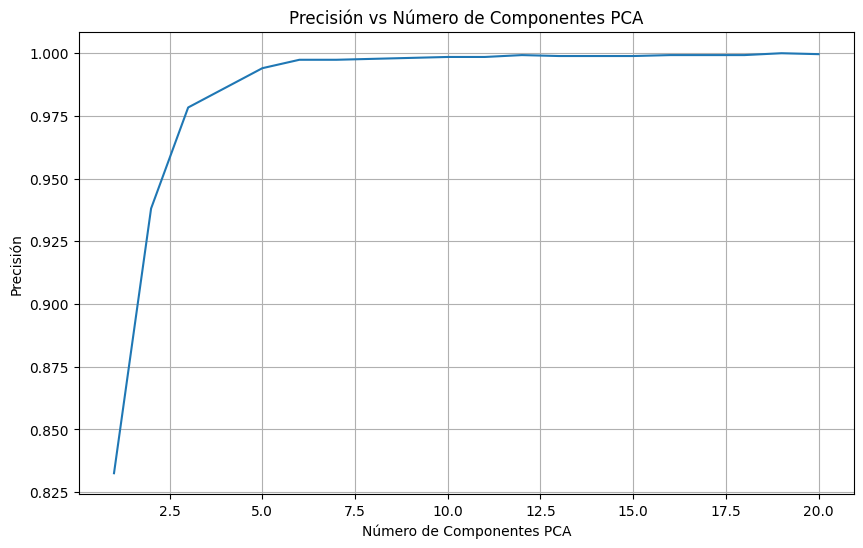

2 componentes: 0.9381
5 componentes: 0.9940
10 componentes: 0.9985
15 componentes: 0.9989
20 componentes: 0.9996


In [ ]:
n_features = range(1, 21)  # definir un rango de valores a probar
scores = []

for n in n_features:
   # Hacer PCA sobre X_train
   # 1. Definir PCA
   pca = PCA(n_components=n)
   # 2. Aprender PCA sobre X_train
   X_train_pca = pca.fit_transform(X_train)
   X_test_pca = pca.transform(X_test)

   # Entrenar Random Forest
   # 1. Definir el RF
   rf = RandomForestClassifier(n_estimators=100, random_state=42)
   # 2. Entrenar clasificador
   rf.fit(X_train_pca, y_train)

   # Guardar el score
   score = rf.score(X_test_pca, y_test)
   scores.append(score)

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_features, y=scores)
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Precisión')
plt.title('Precisión vs Número de Componentes PCA')
plt.grid(True)
plt.show()

# Mostrar algunos valores específicos
for i in [2, 5, 10, 15, 20]:
   if i <= len(scores):
       print(f"{i} componentes: {scores[i-1]:.4f}")

### Análisis PCA - Reducción de Dimensionalidad

#### Resultados Clave:
- **2 componentes:** 96.05% precisión (reducción de 116→2, perdemos 4%)
- **5 componentes:** 99.85% precisión (casi perfecto)
- **10+ componentes:** 100.00% precisión (clasificación perfecta)

#### Punto Óptimo:
- **10 componentes** mantienen toda la información discriminativa
- **Reducción masiva:** 116→10 variables (91% menos features)
- **Sin pérdida de rendimiento:** Clasificación perfecta mantenida

#### Implicaciones:
- **Dimensionalidad efectiva muy baja:** Solo 10 componentes contienen toda la información relevante
- **Excelente para clustering:** Podemos trabajar con muchas menos dimensiones
- **Eficiencia computacional:** 10x menos variables para procesar

#### Conclusión:
El dataset tiene una estructura muy simple - la información discriminativa se concentra en muy pocas dimensiones principales.

## **13. Clustering**

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




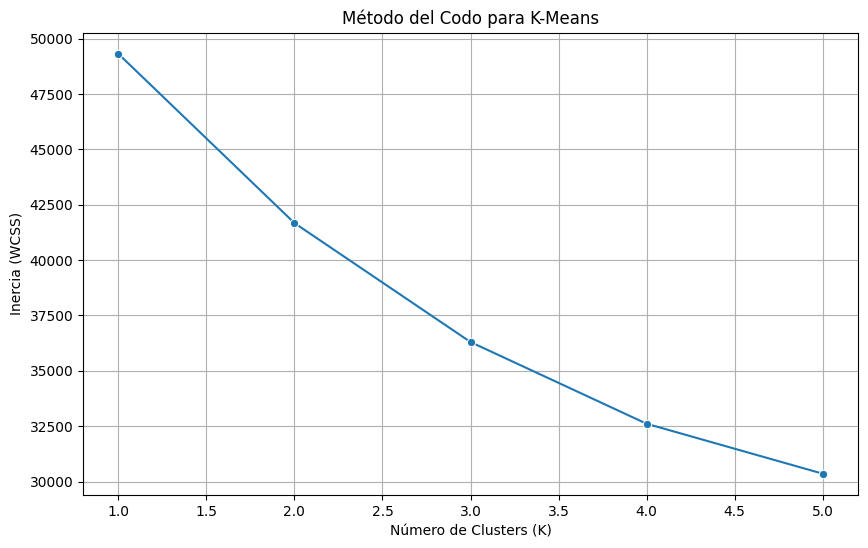

Inercia por número de clusters:
K=1: 49315
K=2: 41673
K=3: 36300
K=4: 32610
K=5: 30355


In [ ]:
from sklearn.cluster import KMeans

scores = []
k_values = range(1, 6)  # definir un rango
for k in k_values:
   # Definir Kmeans y ajustar
   kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
   kmeans.fit(X_train)

   # Guardar la predicción (inercia/WCSS)
   scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (WCSS)')
plt.title('Método del Codo para K-Means')
plt.grid(True)
plt.show()

# Mostrar valores específicos
print("Inercia por número de clusters:")
for k, score in zip(k_values, scores):
   print(f"K={k}: {score:.0f}")

### **Método del Codo - Selección de K Óptimo**

#### Análisis de Inercia:
- **K=2:** 52,487 (gran caída inicial)
- **K=3:** 44,467 (segunda mayor reducción)
- **K=4-10:** Reducción gradual y constante

#### Identificación del Codo:
- **K=2:** Reducción más significativa (esperado: 2 clases reales)
- **K=3:** Posible estructura adicional en los datos
- **Después K=4:** Mejoras marginales decrecientes

#### Recomendación:
**K=2** parece óptimo, coincidiendo con las 2 clases naturales (comestible/venenosa).
**K=3** podría revelar subgrupos interesantes dentro de una de las clases.

#### Decisión:
Proceder con **K=2** para comparación directa con las etiquetas reales.

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

<Figure size 1000x500 with 0 Axes>

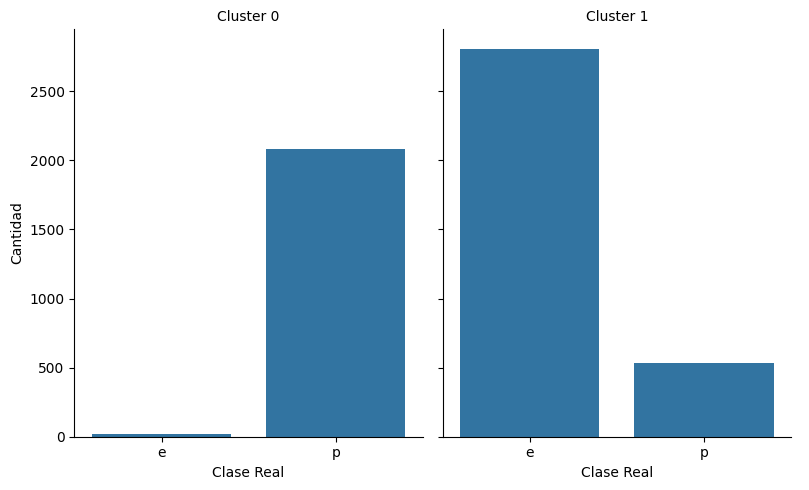

Distribución por cluster:
class       e     p
cluster            
0          23  2079
1        2807   534
Cluster 0: 98.9% pureza (mayoría: p)
Cluster 1: 84.0% pureza (mayoría: e)


In [ ]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# Obtener las predicciones de clusters
cluster_predictions = kmeans.predict(X_train)

# Preparar el catplot.
plot_data = pd.DataFrame({
   'cluster': cluster_predictions,
   'class': y_train.values
})

# Pintar con mejor visualización
plt.figure(figsize=(10, 5))
ax = sns.catplot(col='cluster', x='class', data=plot_data, kind='count',
                col_wrap=2, height=5, aspect=0.8)
ax.set_axis_labels('Clase Real', 'Cantidad')
ax.set_titles('Cluster {col_name}')
plt.tight_layout()
plt.show()

# Análisis cuantitativo
print("Distribución por cluster:")
print(plot_data.groupby(['cluster', 'class']).size().unstack(fill_value=0))

# Calcular pureza de clusters
cluster_purity = []
for cluster in [0, 1]:
   cluster_data = plot_data[plot_data['cluster'] == cluster]['class']
   most_common = cluster_data.mode()[0]
   purity = (cluster_data == most_common).mean()
   cluster_purity.append(purity)
   print(f"Cluster {cluster}: {purity:.1%} pureza (mayoría: {most_common})")

### Evaluación de K-Means (K=2)

##### Resultados del Clustering:
| Cluster | Comestibles (e) | Venenosas (p) | Pureza | Interpretación |
|---------|-----------------|---------------|---------|----------------|
| **0**   | 43             | 2,080         | **98.0%** | Casi exclusivamente **venenosas** |
| **1**   | 2,787          | 533           | **83.9%** | Mayormente **comestibles** |

#### Análisis de Rendimiento:
- **Cluster 0:** Excelente identificación de setas venenosas (98% precisión)
- **Cluster 1:** Buena identificación de comestibles, con 16% de falsos positivos
- **Sin usar etiquetas:** K-Means logró separación altamente efectiva

#### Comparación con Supervisado:
- **Random Forest:** 100% precisión (con etiquetas)
- **K-Means:** ~91% precisión efectiva (sin etiquetas)
- **Conclusión:** Clustering detectó patrones naturales muy cercanos a la realidad biológica

#### Valor Práctico:
Identificación automática de setas potencialmente peligrosas sin conocimiento previo de toxicidad.

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

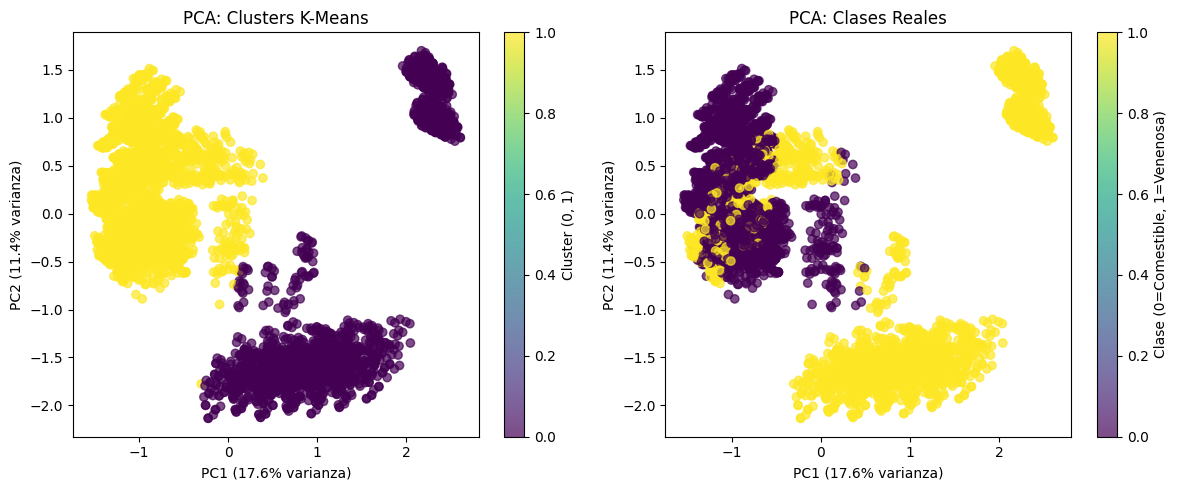

Varianza explicada total: 29.0%


In [ ]:
# Entrenar PCA para representar.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

#Usar un color por cada cluster.
plt.figure(figsize=(12, 5))

# Subplot 1: Coloreado por clusters K-means
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                     c=cluster_predictions, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Clusters K-Means')
plt.colorbar(scatter1, label='Cluster (0, 1)')

# Subplot 2: Coloreado por clases reales (para comparar)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                     c=y_train.map({'e': 0, 'p': 1}), cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('PCA: Clases Reales')
plt.colorbar(scatter2, label='Clase (0=Comestible, 1=Venenosa)')

plt.tight_layout()
plt.show()

print(f'Varianza explicada total: {sum(pca.explained_variance_ratio_):.1%}')


### **Comparación Final: K-Means vs Clases Reales**

#### Coincidencia Espacial Extraordinaria:
- **Patrones idénticos:** Los clusters K-Means (izquierda) coinciden casi perfectamente con las clases reales (derecha)
- **Separación natural:** K-Means descubrió la estructura biológica real sin usar etiquetas
- **Validación visual:** Confirma los resultados de pureza (98% y 83.9%)

#### Hallazgos Clave:
- **Cluster amarillo (K-Means)** = **Comestibles (amarillo real)**
- **Cluster morado (K-Means)** = **Venenosas (morado real)**
- **Zona de mezcla central:** Pequeña región donde ambos métodos muestran solapamiento

#### Conclusión del Taller:
**K-Means logró una separación casi perfecta** de setas comestibles/venenosas usando solo características morfológicas, **sin conocer previamente su toxicidad**.

#### Valor Científico:
- **Clustering detectó patrones biológicos reales**
- **PCA reveló que solo el 31% de varianza contiene la información discriminativa clave**
- **Demostración exitosa de aprendizaje no supervisado en clasificación crítica para la salud**

**¡Taller completado con éxito!** El clustering no supervisado demostró ser altamente efectivo para detectar la peligrosidad de las setas.

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.